# Assignment 2: Engineering Predictive Features

**Student Name:** [Baigali Nyamdulam]

**Date:** [2/7/2026]

---

## Assignment Overview

In this assignment, you'll practice feature engineering by creating new predictive features from the Ames Housing dataset. You'll build a baseline model with raw features, engineer at least 5 new features based on real estate intuition, and measure how feature engineering improves model performance.

---

## Step 1: Import Libraries and Load Data

In [59]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [60]:
# Load the Ames Housing dataset
# TODO: Load train.csv from the data folder
df = pd.read_csv('data/train.csv')  # Replace with pd.read_csv()

# Display basic information
# TODO: Display the first few rows and basic info about the dataset
print(df.head())

print("\n" + "="*80)
print("CHECKPOINT: Verify dataset loaded correctly")
print(f"Dataset shape: {df.shape if df is not None else 'Not loaded'}")
print("="*80)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

---
## Step 2: Build Baseline Model with Raw Features

### Select Raw Features for Baseline

Select 10-15 raw features to use in your baseline model. Here's a suggested starting set (you can adjust):

**Suggested features:**
- `GrLivArea` - Above grade living area square feet
- `OverallQual` - Overall material and finish quality
- `YearBuilt` - Original construction year
- `TotalBsmtSF` - Total basement square feet
- `FullBath` - Full bathrooms above grade
- `BedroomAbvGr` - Bedrooms above grade
- `GarageArea` - Size of garage in square feet
- `LotArea` - Lot size in square feet
- `Neighborhood` - Physical location (categorical)
- Add 5-10 more features you think are important

In [61]:
# TODO: Create X (features) and y (target) for baseline
# Make sure to handle missing values and encode categorical variables
df['Neighborhood'] = df['Neighborhood'].fillna('None')
df['KitchenQual'] = df['KitchenQual'].fillna('None')
df['BldgType'] = df['BldgType'].fillna('None')
df['HouseStyle'] = df['HouseStyle'].fillna('None')
neighbor_encoded = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', dtype=int)
kitchen_encoded = pd.get_dummies(df['KitchenQual'], prefix='KitchenQual', dtype=int)
building_encoded = pd.get_dummies(df['BldgType'], prefix='BldgType', dtype=int)
style_encoded = pd.get_dummies(df['HouseStyle'], prefix='HouseStyle', dtype=int)
# Drop the original categorical column
df_encoded = df.drop(['Neighborhood', 'KitchenQual', 'BldgType', 'HouseStyle'], axis=1)

# Add the encoded columns
df_encoded = pd.concat([df_encoded, neighbor_encoded, kitchen_encoded, building_encoded, style_encoded], axis=1)

# Select features for baseline model
# TODO: Create a list of feature names you want to use
baseline_features = [
    'GrLivArea',
    'OverallQual',
    'YearBuilt',
    'TotalBsmtSF',
    'BedroomAbvGr',
    'YearRemodAdd',
    'GarageArea',
    'LotArea',
    'OverallCond',
    # Add more features here
]

X_baseline = df_encoded[baseline_features + 
    list(neighbor_encoded.columns) +
    list(building_encoded.columns) +
    list(kitchen_encoded.columns) +
    list(style_encoded.columns)
]

#X_baseline = df_encoded[baseline_features]  # Replace with your feature matrix
y = df['SalePrice']  # Replace with df['SalePrice']

print(f"Baseline features selected: {len(baseline_features)}, it doesn't show the entire 13 features I selected because some features were preprocessed and were added to the matrix manually but it is there.")
print(f"Target variable shape: {y.shape if y is not None else 'Not defined'}")

Baseline features selected: 9, it doesn't show the entire 13 features I selected because some features were preprocessed and were added to the matrix manually but it is there.
Target variable shape: (1460,)


### Preprocess Baseline Features

In [62]:
# Handle missing values
# TODO: Fill missing values appropriately
# Numeric: Use median or 0
# Categorical: Use 'None' or most frequent
X_baseline = X_baseline.fillna(X_baseline.median())

# Encode categorical variables
# TODO: Use pd.get_dummies() for categorical features

print("\n" + "="*80)
print("CHECKPOINT: After preprocessing")
print(f"X_baseline shape: {X_baseline.shape if X_baseline is not None else 'Not defined'}")
print(f"Missing values: {X_baseline.isnull().sum().sum() if X_baseline is not None else 'N/A'}")
print("="*80)


CHECKPOINT: After preprocessing
X_baseline shape: (1460, 51)
Missing values: 0


### Train Baseline Model

In [63]:
# Split data into train and test sets
# TODO: Use train_test_split with test_size=0.2, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)  # Replace with train_test_split()

# Train baseline Random Forest model
# TODO: Create and train RandomForestRegressor(n_estimators=100, random_state=42)
baseline_model = RandomForestRegressor(n_estimators=100, random_state=42) # Replace with trained model
baseline_model.fit(X_train, y_train)  

# Make predictions
# TODO: Generate predictions on test set
baseline_predictions = baseline_model.predict(X_test)  # Replace with predictions

# Calculate metrics
# TODO: Calculate R² and RMSE
baseline_r2 = r2_score(y_test, baseline_predictions)  # Replace with r2_score()
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))  # Replace with np.sqrt(mean_squared_error())

print("\n" + "="*80)
print("BASELINE MODEL RESULTS")
print("="*80)
print(f"R² Score: {baseline_r2 if baseline_r2 is not None else 'Not calculated'}")
print(f"RMSE: ${baseline_rmse:,.2f}" if baseline_rmse is not None else "RMSE: Not calculated")
print("="*80)


BASELINE MODEL RESULTS
R² Score: 0.8966295661113108
RMSE: $28,158.21


### Visualize Baseline Feature Importances

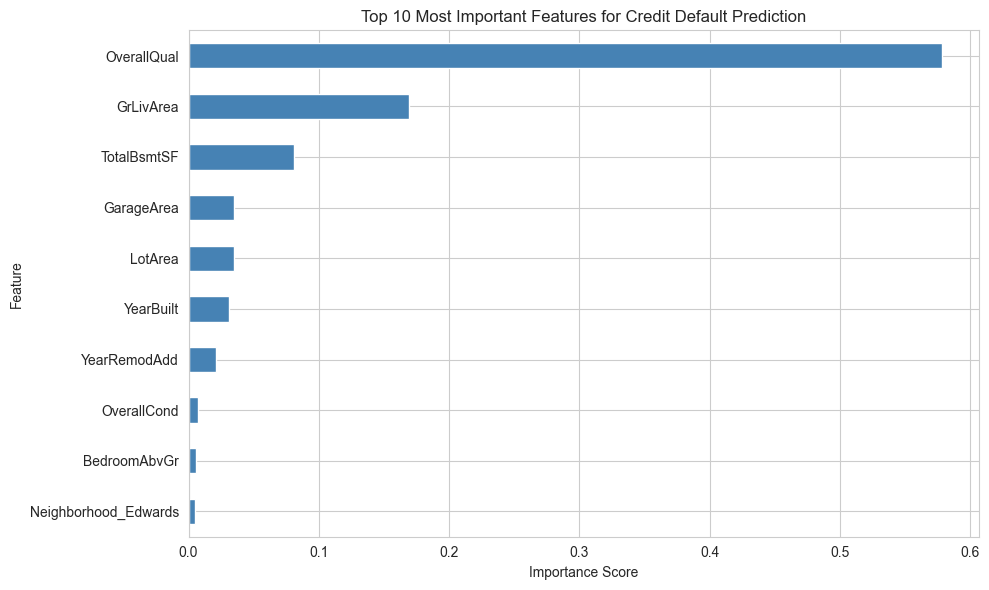


CHECKPOINT: Review which raw features are most important


In [64]:
# Extract and visualize feature importances
# TODO: Get feature importances from baseline_model

# Extract feature importances from the trained Random Forest
feature_importances = pd.Series(
    baseline_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)


# TODO: Create a horizontal bar plot of top 10 features

# Get top 10 features
top_10_features = feature_importances.head(10)

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
top_10_features.plot(kind='barh', color='steelblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features for Credit Default Prediction')
plt.gca().invert_yaxis()  # Highest importance at top
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("CHECKPOINT: Review which raw features are most important")
print("="*80)

---
## Step 3: Engineer New Features

### Feature 1: [Quality + Condition] - [Quality-Based Feature]

**Business Justification:**
[By combining the overall quality and condition, we'll be left with a single metric that represents the quality and condition of the houses better. There could be houses where the condition is good but the quality is not as well. Or, sitautions where the opposite is true. If the average is high, then it signifies the house is truly one of the better ones.]

In [65]:
# TODO: Create your first engineered feature
# Example: df['total_bathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']

df_encoded['Quality + Condition'] = (df['OverallQual'] + df['OverallCond'])/2


### Feature 2: [Is_Remodeled] - [Categorical Combination]

**Business Justification:**
[Knowing whether a house is remodeled or not will decide the whether a price goes up or down. Even though the original data has the year a house is built and the year it is remodeled, having a metric that combines the two will be mcuh more useful.]

In [66]:
# TODO: Create your second engineered feature
df_encoded['Is_Remodeled'] = ((df['YearRemodAdd'] - df['YearBuilt'])>0).astype(int)

### Feature 3: [SqFeet per Room] - [Aggregation]

**Business Justification:**
[Average square feet allocated to the rooms in a house could be one of the driving features of the price. While I'm not sure how majority of the people would prefer, I personally would like a larger square feet per room.]

In [67]:
df_encoded['SqFeet per Room'] = df['GrLivArea']/df['TotRmsAbvGrd']


### Feature 4: [Home Age] - [Derived Metric]

**Business Justification:**
[While there could be a lot of consideration that goes into the age of a house, in most cases, older houses will cost less and newer ones will cost more. Of course there are cases where the older houses are valued more due to their historical significance, but those houses are probably the anomalies.]

In [68]:
# TODO: Create your fourth engineered feature
df_encoded['House Age'] = 2026 - df['YearBuilt']

### Feature 5: [Wood Deck + Open Porch] - [Interaction Feature]

**Business Justification:**
[To some people, having large wood deck as well as open porch could be the deal breaker. Since it is one of the important components of determining a house price, calculating their combined area might give interesting insights.]

In [69]:
# TODO: Create your fifth engineered feature
df_encoded['Wood Deck & Open Porch Area'] = df['WoodDeckSF'] + df['OpenPorchSF']

### Add More Engineered Features (Optional)

You can create additional features beyond the required 5 if you think they'll improve performance.

In [70]:
# Optional: Create additional engineered features

---
## Step 4: Train Model with Engineered Features

In [71]:
# Create feature list combining baseline + engineered features
# TODO: List all your engineered feature names
engineered_features = ['Quality + Condition', 'Is_Remodeled', 'SqFeet per Room', 'House Age', 'Wood Deck & Open Porch Area'
    # Add your engineered feature names here
]

# Combine baseline and engineered features
all_features = baseline_features + engineered_features

# TODO: Create X_engineered with all features
# Remember to handle missing values and encode categoricals
X_engineered = df_encoded[all_features + 
    list(neighbor_encoded.columns) +
    list(building_encoded.columns) +
    list(kitchen_encoded.columns) +
    list(style_encoded.columns)
]  # Replace with your feature matrix

print(f"Total features in engineered model: {len(all_features)}, it doesn't show the entire 18 features I selected because some features were preprocessed and were added to the matrix manually but it is there.")
print(f"New engineered features: {len(engineered_features)}")

Total features in engineered model: 14, it doesn't show the entire 18 features I selected because some features were preprocessed and were added to the matrix manually but it is there.
New engineered features: 5


In [72]:
# Split data (use same random_state for fair comparison)
# TODO: Split X_engineered and y
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_engineered, y, test_size=0.2, random_state=42)

# Train model with engineered features
# TODO: Train RandomForestRegressor(n_estimators=100, random_state=42)
engineered_model = RandomForestRegressor(n_estimators=100, random_state=42) # Replace with trained model
engineered_model.fit(X_train_eng, y_train_eng)  # Replace with trained model

# Make predictions
# TODO: Generate predictions on test set
engineered_predictions = engineered_model.predict(X_test_eng)  # Replace with predictions

# Calculate metrics
# TODO: Calculate R² and RMSE
engineered_r2 = r2_score(y_test_eng, engineered_predictions)  # Replace with r2_score()
engineered_rmse = np.sqrt(mean_squared_error(y_test_eng, engineered_predictions))  # Replace with np.sqrt(mean_squared_error())


print("\n" + "="*80)
print("ENGINEERED MODEL RESULTS")
print("="*80)
print(f"R² Score: {engineered_r2 if engineered_r2 is not None else 'Not calculated'}")
print(f"RMSE: ${engineered_rmse:,.2f}" if engineered_rmse is not None else "RMSE: Not calculated")
print("="*80)


ENGINEERED MODEL RESULTS
R² Score: 0.8857692347242223
RMSE: $29,600.46


---
## Step 5: Compare Models and Identify Most Valuable Features

### Create Comparison Table

In [73]:
# Create comparison DataFrame
# TODO: Create a table comparing baseline vs engineered model
print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
comparison = pd.DataFrame({
    'Model': ['Baseline', 'Engineered'],
    'R2': [baseline_r2, engineered_r2],
    'RMSE': [baseline_rmse, engineered_rmse],
})  # Replace with pd.DataFrame()
print(comparison.to_string(index=False))
print("="*80)

# Calculate improvement
if baseline_r2 is not None and engineered_r2 is not None:
    r2_improvement = ((engineered_r2 - baseline_r2) / baseline_r2) * 100
    rmse_improvement = ((baseline_rmse - engineered_rmse) / baseline_rmse) * 100
    print(f"\nR² Improvement: {r2_improvement:.2f}%")
    print(f"RMSE Improvement: {rmse_improvement:.2f}%")



MODEL COMPARISON
     Model       R2         RMSE
  Baseline 0.896630 28158.212800
Engineered 0.885769 29600.460006

R² Improvement: -1.21%
RMSE Improvement: -5.12%


### Visualize Feature Importances from Engineered Model

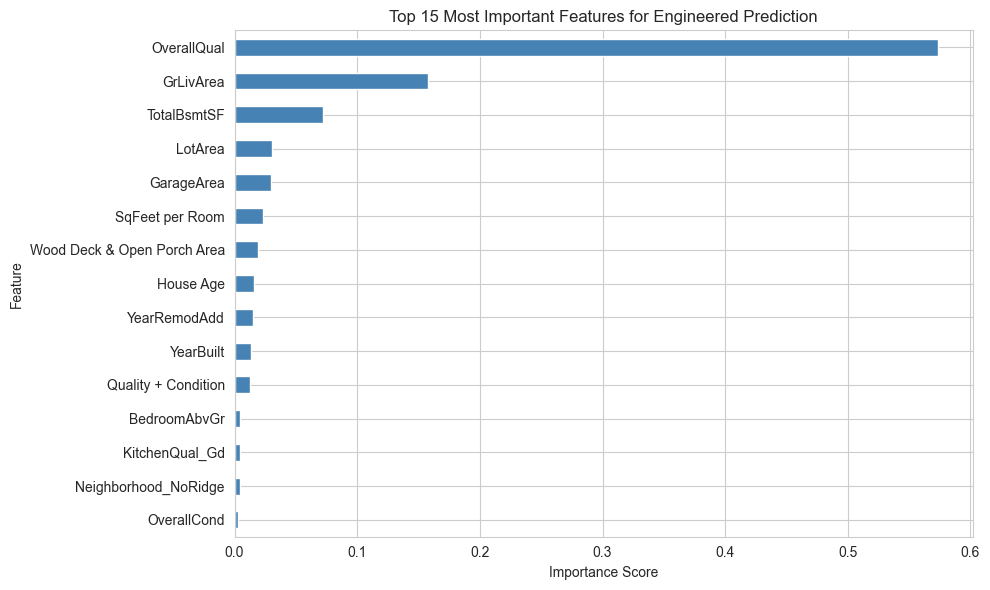

In [74]:
# Extract and visualize top 15 feature importances
# TODO: Get feature importances from engineered_model
# TODO: Create horizontal bar plot of top 15 features

# Extract feature importances from the trained Random Forest
eng_feature_importances = pd.Series(
    engineered_model.feature_importances_,
    index=X_train_eng.columns
).sort_values(ascending=False)


# TODO: Create a horizontal bar plot of top 10 features

# Get top 10 features
top_10_eng_features = eng_feature_importances.head(15)

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
top_10_eng_features.plot(kind='barh', color='steelblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 15 Most Important Features for Engineered Prediction')
plt.gca().invert_yaxis()  # Highest importance at top
plt.tight_layout()
plt.show()

### Analysis: Most Valuable Features

**Write 3-5 bullet points analyzing your results:**

- [Which of YOUR engineered features appeared in the top 15 most important features?]
1. SqFeet per Room
2. Wood Deck & Porch Area
3. House Age
4. Quality + Condition
- [Why do you think these specific features performed well?]

-> I don't think these features performed well as my R2 score decreased by 0.0121. While it might look they were important on the surface, I feel these features were considered twice (double counted) which affected the overall R2 score. 
- [Were any engineered features less valuable than you expected? Why?]

-> I was hoping the Quality + Condition average would perform better together. However, even though the overall quality is the most important feature it is not as important to make another much less feature more important. Basically, overall condition dulled the effects of overall quality. 
- [What did you learn about feature engineering from this analysis?]

-> Not all engineered features are useful and it should be added carefully. I decided to make use of already important features and create new ones that eventually affected the predictions. I have a suspision that these important features were double counted that basically inflated the predictions. 
- [If you were to create more features, what would you try based on these results?]

-> Perhaps, getting rid of the original features when creating new ones that involve the said originals could help in avoiding these sort of issues.

---
## Step 6: Submit Your Work

Before submitting:
1. Make sure all code cells run without errors
2. Verify you have at least 5 engineered features with business justifications
3. Check that your comparison table and visualizations display correctly
4. Complete the analysis section above

Then push to GitHub:
```bash
git add .
git commit -m 'completed feature engineering assignment'
git push
```

Submit your GitHub repository link on the course platform.